<a href="https://colab.research.google.com/github/Sottim/AIDA-Spring2023/blob/main/Project_1_AIDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Numerical libraries
import numpy as np 
from sklearn.cluster import KMeans
# to handle data in form of rows and colums
import pandas as pd 
#importing plotting libraries 
import matplotlib.pyplot as plt
from sklearn import metrics


In [ ]:
#reading the CSV file
fashion_brands = pd.read_csv("fashionbrands_Ashoka.csv")
fashion_brands.head()


,brand,luxurious,traditional,intellectual,brilliant,calm,youthful,friendly,simple,energetic
0,Chanel,449,252,106,236,61,13,8,29,16
1,Louis Vuitton,410,286,83,142,80,18,20,48,31
2,Christian Dior,356,200,95,206,67,19,18,27,9
3,Tiffany,362,219,103,187,59,55,36,35,10
4,Rolex,442,248,114,89,109,4,9,52,12


In [ ]:
print(fashion_brands.describe())

        luxurious  traditional  intellectual   brilliant        calm  \
count   11.000000    11.000000     11.000000   11.000000   11.000000   
mean   237.636364   160.636364     73.272727   95.272727   74.000000   
std    181.888027   115.666999     48.588251   85.157608   57.771966   
min      6.000000     5.000000     10.000000    2.000000   10.000000   
25%     48.000000    36.000000     20.500000   24.000000   29.500000   
50%    287.000000   200.000000     95.000000   88.000000   61.000000   
75%    386.000000   250.000000    104.500000  164.500000   94.500000   
max    449.000000   287.000000    143.000000  236.000000  199.000000   

         youthful    friendly      simple   energetic  
count   11.000000   11.000000   11.000000   11.000000  
mean   111.090909   90.090909   82.454545   65.000000  
std    116.862701   99.938436   54.100580   98.557597  
min      4.000000    8.000000   27.000000    9.000000  
25%     18.500000   19.000000   41.500000    9.500000  
50%     55.0000

In [ ]:
#Lets calculate the overall scrores of each brand 
fashion_brands['overall'] = fashion_brands.sum(axis=1) 
print(fashion_brands["overall"])

0     1170
1     1118
2      997
3     1066
4     1079
5     1187
6      916
7      701
8     1135
9      753
10     762
Name: overall, dtype: int64


<ipython-input-37-f31af545608e>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fashion_brands['overall'] = fashion_brands.sum(axis=1)


In [ ]:
#iloc[:, 1:10]  indexer means  the : in the row position specifies that all rows 
#should be included, while 0:11 in the column position specifies that columns 1 to 10 (excluding the name of the brands)
# iloc is done to extract the attribute scores
brands_x = fashion_brands.iloc[:, 1:10]

#Normalize the data using MinmaxScaler class 
from sklearn.preprocessing import MinMaxScaler 
min_max_scaler = MinMaxScaler()

brands_z = min_max_scaler.fit_transform(brands_x)
brands_z



array([[1.        , 0.87588652, 0.72180451, 1.        , 0.26984127,
        0.03321033, 0.        , 0.01162791, 0.0248227 ],
       [0.91196388, 0.9964539 , 0.54887218, 0.5982906 , 0.37037037,
        0.05166052, 0.0371517 , 0.12209302, 0.07801418],
       [0.79006772, 0.69148936, 0.63909774, 0.87179487, 0.3015873 ,
        0.05535055, 0.03095975, 0.        , 0.        ],
       [0.80361174, 0.75886525, 0.69924812, 0.79059829, 0.25925926,
        0.18819188, 0.08668731, 0.04651163, 0.0035461 ],
       [0.98419865, 0.86170213, 0.78195489, 0.37179487, 0.52380952,
        0.        , 0.00309598, 0.14534884, 0.0106383 ],
       [0.63431151, 1.        , 1.        , 0.17094017, 1.        ,
        0.09225092, 0.18266254, 0.56395349, 0.        ],
       [0.43340858, 0.65957447, 0.68421053, 0.15811966, 0.72486772,
        0.2103321 , 0.19195046, 0.4244186 , 0.        ],
       [0.18058691, 0.20212766, 0.15789474, 0.36752137, 0.13227513,
        0.78228782, 0.2755418 , 0.22093023, 0.04255319],


In [ ]:
# K_means clustering 
cluster = KMeans(n_clusters = 3, random_state = 1)
cluster.fit(brands_z)
# Getting the clusters center/centroid using function cluster_centers_
centroids = cluster.cluster_centers_
centroids


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.53386005, 0.82978723, 0.84210526, 0.16452991, 0.86243386,
        0.15129151, 0.1873065 , 0.49418605, 0.        ],
       [0.04853273, 0.05673759, 0.03947368, 0.10576923, 0.06878307,
        0.92896679, 0.56578947, 0.55813953, 0.51684397],
       [0.8979684 , 0.83687943, 0.67819549, 0.72649573, 0.34497354,
        0.06568266, 0.03157895, 0.06511628, 0.02340426]])

In [ ]:
prediction = cluster.predict(brands_z)  # Is to predict in which cluster each brand will go
# Once the cluster numbers are predicted, I want to insert a new column in my data set 
# Called Group and here I will put the cluster number 
fashion_brands["Group"] = pd.DataFrame(prediction, columns = ["Group"])
fashion_brands.to_csv('results.csv')

In [ ]:
fashion_brands 
# Using the K-mean clustering, we divided the brands in the groups of 3 and
# We found that ... Describe about each brand name in the ppt

,brand,luxurious,traditional,intellectual,brilliant,calm,youthful,friendly,simple,energetic,overall,Group
0,Chanel,449,252,106,236,61,13,8,29,16,1170,2
1,Louis Vuitton,410,286,83,142,80,18,20,48,31,1118,2
2,Christian Dior,356,200,95,206,67,19,18,27,9,997,2
3,Tiffany,362,219,103,187,59,55,36,35,10,1066,2
4,Rolex,442,248,114,89,109,4,9,52,12,1079,2
5,Burberry,287,287,143,42,199,29,67,124,9,1187,0
6,Ralph Lauren,198,191,101,39,147,61,70,100,9,916,0
7,Benetton,86,62,31,88,35,216,97,65,21,701,1
8,Uniqlo,6,7,10,8,23,260,331,199,291,1135,1
9,H&M,8,5,10,2,10,272,132,91,223,753,1


<Axes: >

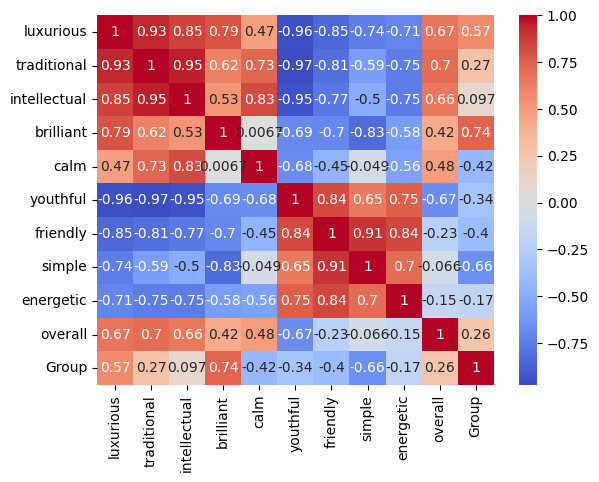

In [ ]:
# Now we will use the correlation analysis by calculating the correlation matrix.
# We use the heatmap visualization technique
import seaborn as sns
correlation = fashion_brands.corr()
sns.heatmap(correlation, cmap = 'coolwarm', annot= True)


In [ ]:
# Here we take the approach of Principle Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
# standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(brands_x)

In [ ]:
# We now create a Principal Component Analysis object with 2 principal components
pca = PCA(n_components=2)

# We now fit the PCA model in order to the standardized data that we have 
pca.fit(data_std)


PCA(n_components=2)

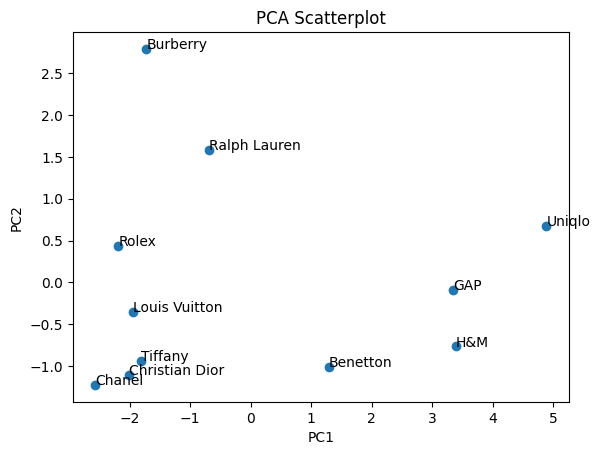

In [ ]:
# transform the data onto the first two principal components
data_pca = pca.transform(data_std)

# create a scatterplot of the first two principal components
plt.scatter(data_pca[:,0], data_pca[:,1])

# label each point with its brand name
for i, brand in enumerate(fashion_brands['brand']):
    plt.annotate(brand, (data_pca[i,0], data_pca[i,1]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatterplot')

plt.show()
